# Costa Rica Institute of Technology
* Course: MP-6122 Pattern Recognition
* Student: Jose Martinez Hdez
* Year: 2022
* Laboratory 3: CNN and ANN - MNIST Classification in Keras using a Jetson Nano

# Introduction

According to the [NVIDIA Jetson documentation](https://developer.nvidia.com/embedded/jetson-nano-developer-kit). NVIDIA® Jetson Nano™ Developer Kit is a small, powerful computer that lets you run multiple neural networks in parallel for applications like image classification, object detection, segmentation, and speech processing. All in an easy-to-use platform that runs in as little as 5 watts. The Jetson Nano could be seen in the following image:

![jetson](https://drive.google.com/uc?id=12J9vuJEO6vF4UJJVMt2Os0fDUtnb7rFb)

This board has the following I/O ports: 

1. microSD card slot for main storage
2. 40-pin expansion header
3. Micro-USB port for 5V power input, or for Device Mode
4. Gigabit Ethernet port
5. USB 3.0 ports (x4)
6. HDMI output port
7. DisplayPort connector
8. DC Barrel jack for 5V power input
9. MIPI CSI-2 camera connectors

And the technical specifications are:

![tech](https://drive.google.com/uc?id=13SMMkuE5Jh0UkOv1TGAbCL97h40hsIN7)

**References**: 

- https://developer.nvidia.com/embedded/jetson-nano-developer-kit
- https://developer.nvidia.com/embedded/learn/get-started-jetson-nano-devkit
- https://pyimagesearch.com/2019/05/06/getting-started-with-the-nvidia-jetson-nano/

# Getting started with the NVIDIA Jetson Nano

## Prepare for Setup
Before you can even boot up your NVIDIA Jetson Nano you need three things:

1. A micro-SD card (minimum 16GB), but it is recommended to use a micro-SD card of 32GB or more.	
2. A 5V 2.5A MicroUSB power supply
3. An ethernet cable or Wi-Fi usb adapter (Yes, it doesn't have Wi-Fi embedded on it 😭) 

To go deeper into the details of the Jetson Nano you can read the following article:

- https://developer.nvidia.com/embedded/learn/get-started-jetson-nano-devkit#prepare

## Write Image to the microSD Card

To prepare your microSD card, you’ll need a computer with Internet connection and the ability to read and write SD cards, either via a built-in SD card slot or adapter.

1. Download the [Jetson Nano Developer Kit SD Card Image](https://developer.nvidia.com/jetson-nano-sd-card-image), and note where it was saved on the computer.
2. Write the image to your microSD card by following the instructions below according to your computer’s operating system: Windows, macOS, or Linux.

    - [Instructions for Windows](https://developer.nvidia.com/embedded/learn/get-started-jetson-nano-devkit#collapse-write_windows)
    - [Instructions for MacOS](https://developer.nvidia.com/embedded/learn/get-started-jetson-nano-devkit#collapse-write_macos)
    - [Instructions for Linux](https://developer.nvidia.com/embedded/learn/get-started-jetson-nano-devkit#collapse-write_linux)

## Setup and First Boot

There are two ways to interact with the developer kit: 

1. With display, keyboard and mouse attached 
2. In “headless mode” via connection from another computer.

You can conduct the initial setup either way. 

### Initial Setup with Display Attached

1. Insert the microSD card (with system image already written to it) into the slot on the underside of the Jetson Nano module.

![sd](https://drive.google.com/uc?id=13YjsTnZE2IVrQpAW45zDpcw4ptfrXnor)

2. Set the developer kit on top of the paper stand.
3. Power on your computer display and connect it.
4. Connect the USB keyboard and mouse.
4. Connect your Micro-USB power supply (or see the [Jetson Nano Developer Kit User Guide](https://developer.nvidia.com/embedded/learn/get-started-jetson-nano-devkit#) for details about using DC a power supply with a barrel jack connector). The developer kit will power on and boot automatically.

In the first boot, a green LED next to the Micro-USB connector will light as soon as the developer kit powers on. When you boot the first time, the developer kit will take you through some initial setup, including:

- Review and accept NVIDIA Jetson software EULA
- Select system language, keyboard layout, and time zone
- Create username, password, and computer name
- Select APP partition size—it is recommended to use the max size suggested

After logging in, you will see this screen. Congratulations!

![screen](https://drive.google.com/uc?id=13YoDJgyMZM2u5BmyvZUAxrYtuvbyiGy2)

**References**: 

- https://developer.nvidia.com/embedded/jetson-nano-developer-kit
- https://developer.nvidia.com/embedded/learn/get-started-jetson-nano-devkit
- https://pyimagesearch.com/2019/05/06/getting-started-with-the-nvidia-jetson-nano/

# Running the first code in the Jetson Nano

To get started, I really recomended to go over these link provided by NVIDIA:


- https://developer.nvidia.com/embedded/community/jetson-projects
- https://developer.nvidia.com/embedded/learn/jetson-ai-certification-programs#course_outline
- https://github.com/dusty-nv/jetson-inference



# Example of MNIST model running in the Jetson Nano

**Note**: The base code was taken from the following link:

- https://keras.io/examples/vision/mnist_convnet/
- https://github.com/Tony607/keras_mnist
- https://github.com/tflearn/tflearn/blob/master/examples/images/convnet_mnist.py
- https://github.com/fmezacr/patrones/tree/master/TfLearn_MNIST_ANN

## Install dependencies

In [1]:
!pip install keras
!pip install scipy
!pip install numpy
!pip install tensorflow
!pip install opencv-python
!pip install tflearn

     |████████████████████████████████| 462 kB 5.5 MB/s 
     |████████████████████████████████| 107 kB 5.6 MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=8ca0dd6ba11a27370ce2708002157ac5c3ffa1bf3700c0f6c2c10fd4fc4c41e4
  Stored in directory: /root/.cache/pip/wheels/5f/14/2e/1d8e28cc47a5a931a2fb82438c9e37ef9246cc6a3774520271
Successfully built tflearn


## Import packages

In [2]:
from keras import layers, models
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

## Preprocessing

In [3]:
# Preprocessing
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11501568/11490434 [==============================] - 0s 0us/step


## EDA

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


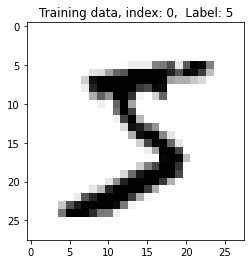

In [4]:
# Visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline

# Function for displaying a training image by it's index in the MNIST set
def show_digit(index):
    label = y_train[index].argmax(axis=0)
    # Reshape 784 array into 28x28 image
    image = x_train[index].reshape([28,28])
    plt.title('Training data, index: %d,  Label: %d' % (index, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()
    
# Display the first (index 0) training image
print(y_train[0])
show_digit(0)

## Building the network

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(16, 3, activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Print summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

## Training the network

In [6]:
# Train the model
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

batch_size = 128
epochs = 15

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 17s 11ms/step - loss: 0.5134 - accuracy: 0.8344 - val_loss: 0.1199 - val_accuracy: 0.9655
Epoch 2/15
422/422 [==============================] - 4s 10ms/step - loss: 0.1513 - accuracy: 0.9536 - val_loss: 0.0874 - val_accuracy: 0.9757
Epoch 3/15
422/422 [==============================] - 4s 10ms/step - loss: 0.1111 - accuracy: 0.9669 - val_loss: 0.0772 - val_accuracy: 0.9775
Epoch 4/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0888 - accuracy: 0.9730 - val_loss: 0.0628 - val_accuracy: 0.9818
Epoch 5/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0762 - accuracy: 0.9766 - val_loss: 0.0587 - val_accuracy: 0.9827
Epoch 6/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0662 - accuracy: 0.9795 - val_loss: 0.0484 - val_accuracy: 0.9868
Epoch 7/15
422/422 [==============================] - 4s 10ms/step - loss: 0.0602 - accuracy: 0.9815 - val_loss: 0.0527 - val_accuracy: 0.984

## Testing the network

In [7]:
# Test the model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.06291648000478745
Test accuracy: 0.982699990272522


## Save the network

In [8]:
# Save model and weights to separated files.
with open("model.json", "w") as file:
    file.write(model.to_json())
model.save_weights("weights.h5")

# Save model and weights to the same file.
model.save('model.h5', include_optimizer=False)


# Using the camera on the Jetson Nano

First, let´s install the required dependencies:

```bash
    sudo apt-get install git cmake
    sudo apt-get install libatlas-base-dev gfortran
    sudo apt-get install libhdf5-serial-dev hdf5-tools
    sudo apt-get install python3-dev
```

The the python package manager:

```bash
    wget https://bootstrap.pypa.io/get-pip.py
    sudo python3 get-pip.py
    rm get-pip.py
```

We’ll be using Python virtual environments in this guide to keep our Python development environments independent and separate from each other.

Using Python virtual environments are a best practice and will help you avoid having to maintain a micro-SD for each development environment you want to use on your Jetson Nano.

To manage our Python virtual environments we’ll be using virtualenv and virtualenvwrapper which we can install using the following command:

    
```bash
    sudo pip install virtualenv virtualenvwrapper
```

Once we’ve installed virtualenv and virtualenvwrapper we need to update our ~/.bashrc

```bash
    echo "export WORKON_HOME=$HOME/.virtualenvs" >> ~/.bashrc
    echo "export VIRTUALENVWRAPPER_PYTHON=/usr/bin/python3" >> ~/.bashrc
    echo "source /usr/local/bin/virtualenvwrapper.sh" >> ~/.bashrc
```

Next, we need to reload the contents of the ~/.bashrc file using the source command:

```bash
    source ~/.bashrc
```

Now, we can create our first virtual environment:

```bash
    mkvirtualenv mnist_env -p /usr/bin/python3
    workon mnist_env
```

At this point, we'll install our application dependencies:

```bash
    cd mnist
    pip install -r requirements.txt
```

Run the following command to start the camera:

``` bash 
    $ python3 test.py
```

Note: You might need to change cap = cv2.VideoCapture(0) to the source of the webcam. 





In [ ]:
import cv2

cap = cv2.VideoCapture(0)

# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    cv2.imshow('Input', frame)

    c = cv2.waitKey(1)
    if c == 27:
        break

cap.release()
cv2.destroyAllWindows()

# Training and running the model on the Jetson Nano

Move to the mnist folder:

```bash
    cd mnist
```

Then fist we need to train the model:

```bash
    python3 keras_train.py
```

Then we need to run the model:

```bash
    python3 keras_cam.py
```